# Data Gathering

In [1]:
import pandas as pd
import numpy as np

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', 'wb') as f:
    f.write(r.content)

In [4]:
image_pred = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [7]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [8]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
jsonfile = pd.read_json('tweet-json.txt', lines=True)

In [7]:
rt_fave = pd.DataFrame(columns=["tweet_id", "retweet_count", "favorite_count"], dtype=int)

with open("tweet-json.txt") as json_file:
    for line in json_file:        
        tweet_data = json.loads(line)
        rt_fave = rt_fave.append(
            {"tweet_id": tweet_data["id"], 
             "retweet_count": tweet_data["retweet_count"], 
             "favorite_count": tweet_data["favorite_count"]}, 
            ignore_index=True)

# Data Assessment

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897...,9,10,Shadow,None,None,None,None
630,794332329137291264,NaN,NaN,2016-11-04 00:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,None,None,None,None
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None


In [12]:
# tweets having multiple ratings 
pd.set_option('display.max_colwidth', -1)
id_text = twitter_archive[['tweet_id','text','rating_numerator','rating_denominator']]
id_text[id_text.text.str.contains(('\d+/\d+.+\d+/\d+'), regex=True, na=False)]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
561,802624713319034886,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
860,763167063695355904,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,8,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [13]:
twitter_archive.tweet_id.duplicated().sum()

0

In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive[twitter_archive['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [16]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_pred.tweet_id.duplicated().any()

False

In [19]:
rt_fave

,tweet_id,retweet_count,favorite_count
0,8.924206e+17,8853.0,39467.0
1,8.921774e+17,6514.0,33819.0
2,8.918152e+17,4328.0,25461.0
3,8.916896e+17,8964.0,42908.0
4,8.913276e+17,9774.0,41048.0
5,8.910880e+17,3261.0,20562.0
6,8.909719e+17,2158.0,12041.0
7,8.907292e+17,16716.0,56848.0
8,8.906092e+17,4429.0,28226.0
9,8.902403e+17,7711.0,32467.0


In [20]:
rt_fave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null float64
retweet_count     2354 non-null float64
favorite_count    2354 non-null float64
dtypes: float64(3)
memory usage: 55.2 KB


In [21]:
rt_fave.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [22]:
rt_fave.tweet_id.duplicated().any()

False

### Quality
##### `twitter_archive` table
- some rows contain retweet record not original tweet
- some records may have mutitple ratings
- tweet id 832088576586297000 rating is populated from date value
- tweet id 883482846933004288 rating numerator is not reflected as decimal value
- tweets with rating denominator less than 10 are having incorrect rating
- tweet_id data type is integer not string
- timestamp data type is string not date
- rating_numerator data type is integer while some text contains decimal value numerator
- inconsistent rating denominator

##### `image_pred` table
- tweet_id data type is integer not string

##### `rt_fave` table
- tweet_id data type is float not string

### Tidiness
- dog stages should be made into one column
- all tables should be merged into one table
- columns that may not be useful for data analysis should be removed (this will be done at the very last step after handling all Tidiness and Quality issues)

# Data Cleaning

In [23]:
ta_clean = twitter_archive.copy()
ip_clean = image_pred.copy()
rf_clean = rt_fave.copy()

### Tidiness

#### dog stages should be made into one column

##### Define
1. Handle 'None' in the 4 dog stages columns
2. Merge the 4 columns into one column
3. Handle rows that are having multiple stages
4. Handle missing values
5. Drop the original 4 dog stages columns

##### Code

In [24]:
# Handle 'None' in the 4 dog stages column
ta_clean.doggo.replace('None','',inplace=True)
ta_clean.floofer.replace('None','',inplace=True)
ta_clean.pupper.replace('None','',inplace=True)
ta_clean.puppo.replace('None','',inplace=True)

In [25]:
# Merge the 4 columns into one column
ta_clean['dog_stages'] = ta_clean.doggo + ta_clean.floofer + ta_clean.pupper + ta_clean.puppo

In [26]:
ta_clean.dog_stages.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [27]:
# Handle rows that are having multiple stages
ta_clean.loc[ta_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
ta_clean.loc[ta_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'
ta_clean.loc[ta_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'

In [28]:
# Handle missing values
ta_clean.loc[ta_clean.dog_stages == '', 'dog_stages'] = np.nan

In [29]:
ta_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

##### Test

In [30]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stages                    380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


#### all tables should be merged into one table

##### Define
Merge ta_clean with rf_clean and ip_clean using outer join

##### Code

In [31]:
twitter_archive_master = pd.merge(ta_clean, rf_clean, on="tweet_id", how="left")

In [32]:
twitter_archive_master = pd.merge(twitter_archive_master, ip_clean, on="tweet_id", how="left")

##### Test

In [33]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stages                    380 non-null object
retweet_count                 1518 non-null float64
favorite_count                1518 non-null float64
jpg_url                       2075 non-null object
img_num                       2

### Quality

#### `twitter_archive`:  some rows contain retweet record not original tweet

##### Define
Drop rows that are having values in retweeted_status_id column.
This action will also drop tweet id 832088576586297000 which populated rating from date value.

##### Code

In [34]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.retweeted_status_id.notnull()].index, inplace=True)

##### Test

In [35]:
twitter_archive_master.retweeted_status_id.notnull().any()

False

In [36]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stages                    344 non-null object
retweet_count                 1420 non-null float64
favorite_count                1420 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 no

#### `twitter_archive` , `image_pred` , `rt_fave`: 
#### - tweet_id data type is integer/float not string
#### - timestamp data type is string not date
#### - rating_numerator data type is integer while some text contains decimal value numerator

##### Define
- Change tweet_id data type to string
- Change timestamp data type to datetime
- Change rating_numerator data type to float

##### Code

In [37]:
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype('str')
twitter_archive_master['timestamp'] = twitter_archive_master['timestamp'].astype('datetime64')
twitter_archive_master['rating_numerator'] = twitter_archive_master['rating_numerator'].astype('float')

##### Test

In [38]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stages                    344 non-null object
retweet_count                 1420 non-null float64
favorite_count                1420 non-null float64
jpg_url                       1994 non-null object
img_num                   

#### `twitter_archive`: some records may have multiple ratings

##### Define
Verify the correct rating given in the text column. If it has 2 ratings, take the average value from the numerator. If one of the rating is invalid, replace the values in the rating_numerator and rating_denominator columns with the correct value.

**Correct ratings (no action required)**
* 703356393781329922 : rating is correct. 9/10 for the dog.
* 695064344191721472 : rating is correct. 4/10 for the dog.
* 694352839993344000 : rating is correct. 10/10 for the dog.
* 674737130913071104 : rating is correct. 10/10 for the dog.
* 673295268553605120 : rating is correct. 8/10 for the dog.
* 672248013293752320 : rating is correct. 10/10 for the dog
* 671154572044468225 : rating is correct. 11/10 for the dog
* 668537837512433665 : rating is correct. 8/10 for the dog.
* 667070482143944705 : rating is correct
* 666835007768551424 : rating is correct. because both dogs get the same rating hence average value will give the same result.

**Replace the numerator with average value**
* 777684233540206592 : rating numerator should be the average of 12 & 11 = 11.5
* 747600769478692864 : rating numerator should be the average of 10 & 7 = 8.5
* 689835978131935233 : rating numerator should be the average of 10 & 11 = 10.5
* 677314812125323265 : rating numerator should be the average of 10 & 11 = 10.5
* 676191832485810177 : rating numerator should be the average of 10 & 7 = 8.5
* 670434127938719744 : rating numerator should be the average of 11 & 8 = 9
* 669037058363662336 : rating numerator should be the average of 10 & 7 = 8.5
* 667544320556335104 : rating numerator should be the average of 10 & 4 = 7
* 667491009379606528 : rating numerator should be the average of 7 & 8 = 7.5
* 674646392044941312 : rating numerator should be the average of 5 & 8 = 6.5
* 714258258790387713 : rating numerator should be the average of 10 & 8 = 9

**Replace numerator value**
* 881633300179243008 : rating numerator should be 13

**Replace both numerator and denominator values**
* 835246439529840640 : rating should be 13/10
* 740373189193256964 : rating should be 14/10
* 722974582966214656 : rating should be 13/10
* 716439118184652801 : rating should be 11/10
* 691483041324204033 : rating should be 10/10
* 682962037429899265 : rating should be 10/10
* 666287406224695296 : rating should be 9/10

##### Code

In [39]:
pd.set_option('display.max_colwidth', -1)
id_text = twitter_archive_master[['tweet_id','text','rating_numerator','rating_denominator']]
id_text[id_text.text.str.contains(('\d+/\d+.+\d+/\d+'), regex=True, na=False)]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17.0,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.0,10


In [40]:
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '777684233540206592'),'rating_numerator']=11.5
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '747600769478692864'),'rating_numerator']=8.5
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '689835978131935233'),'rating_numerator']=10.5
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '677314812125323265'),'rating_numerator']=10.5
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '676191832485810177'),'rating_numerator']=8.5
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '670434127938719744'),'rating_numerator']=9
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '669037058363662336'),'rating_numerator']=8.5
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '667544320556335104'),'rating_numerator']=7
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '667491009379606528'),'rating_numerator']=7.5
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '674646392044941312'),'rating_numerator']=6.5
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '714258258790387713'),'rating_numerator']=9
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '881633300179243008'),'rating_numerator']=13
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '835246439529840640'),'rating_numerator']=13
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '740373189193256964'),'rating_numerator']=14
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '722974582966214656'),'rating_numerator']=13
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '716439118184652801'),'rating_numerator']=11
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '691483041324204033'),'rating_numerator']=10
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '682962037429899265'),'rating_numerator']=10
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '666287406224695296'),'rating_numerator']=9

In [41]:
id_list = ['835246439529840640','740373189193256964','722974582966214656','716439118184652801','691483041324204033','682962037429899265','666287406224695296']

for id in id_list:
    twitter_archive_master.loc[(twitter_archive_master.tweet_id == id),'rating_denominator']=10

##### Test

In [42]:
pd.set_option('display.max_colwidth', -1)
id_text = twitter_archive_master[['tweet_id','text','rating_numerator','rating_denominator']]
id_text[id_text.text.str.contains(('\d+/\d+.+\d+/\d+'), regex=True, na=False)]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,13.0,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.0,10
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",11.5,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,8.5,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,9.0,10
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.0,10


#### `twitter_archive`: tweet id 883482846933004288 numerator rating is not reflected as decimal value

##### Define
Replace the numerator with the correct decimal value

##### Code

In [43]:
twitter_archive_master.loc[(twitter_archive_master.tweet_id == '883482846933004288'),'rating_numerator']=13.5

##### Test

In [44]:
twitter_archive_master[twitter_archive_master.tweet_id == '883482846933004288']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",...,1.0,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True


#### `twitter_archive`: tweets with rating denominator less than 10 are having incorrect rating

##### Define
Some of the incorrect record has been fixed when handling multiple ratings issue. 
One record left, tweet id 810984652412424192, which does not have any ratings.
Remove the record without rating by dropping the row.

##### Code

In [45]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.tweet_id =='810984652412424192'].index, inplace=True)

##### Test

In [46]:
twitter_archive_master[twitter_archive_master.tweet_id =='810984652412424192']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [47]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2174 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2174 non-null datetime64[ns]
source                        2174 non-null object
text                          2174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2174 non-null float64
rating_denominator            2174 non-null int64
name                          2174 non-null object
dog_stages                    344 non-null object
retweet_count                 1419 non-null float64
favorite_count                1419 non-null float64
jpg_url                       1993 non-null object
img_num                   

#### `twitter_archive`: inconsistent rating denominator

##### Define
Standardise the ratings by calculating. The numerator should be divided by the denominator and the result should be stored in a new rating column.

##### Code

In [48]:
twitter_archive_master['rating'] = twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator

##### Test

In [49]:
twitter_archive_master[['rating_numerator','rating_denominator','rating']].sample(5)

,rating_numerator,rating_denominator,rating
1965,7.0,10,0.7
1078,6.0,10,0.6
1613,11.0,10,1.1
2071,6.0,10,0.6
133,13.0,10,1.3


### Tidiness (Final step)

#### columns that may not be useful for data analysis should be removed

##### Define
Remove the following columns:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- rating_numerator
- rating_denominator
- name

##### Code

In [50]:
twitter_archive_master.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','rating_numerator','rating_denominator','name'],inplace=True)

##### Test

In [51]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id          2174 non-null object
timestamp         2174 non-null datetime64[ns]
source            2174 non-null object
text              2174 non-null object
expanded_urls     2116 non-null object
dog_stages        344 non-null object
retweet_count     1419 non-null float64
favorite_count    1419 non-null float64
jpg_url           1993 non-null object
img_num           1993 non-null float64
p1                1993 non-null object
p1_conf           1993 non-null float64
p1_dog            1993 non-null object
p2                1993 non-null object
p2_conf           1993 non-null float64
p2_dog            1993 non-null object
p3                1993 non-null object
p3_conf           1993 non-null float64
p3_dog            1993 non-null object
rating            2174 non-null float64
dtypes: datetime64[ns](1), float64(7), object(12)
memory usage: 356.7+ KB


# Saving Data

In [52]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Data Analysis

In [53]:
df = pd.read_csv('twitter_archive_master.csv')

In [54]:
df

,tweet_id,timestamp,source,text,expanded_urls,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,NaN,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,NaN,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",NaN,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,3261.0,20562.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1.3
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",NaN,NaN,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1.3
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://tw

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 20 columns):
tweet_id          2174 non-null int64
timestamp         2174 non-null object
source            2174 non-null object
text              2174 non-null object
expanded_urls     2116 non-null object
dog_stages        344 non-null object
retweet_count     1419 non-null float64
favorite_count    1419 non-null float64
jpg_url           1993 non-null object
img_num           1993 non-null float64
p1                1993 non-null object
p1_conf           1993 non-null float64
p1_dog            1993 non-null object
p2                1993 non-null object
p2_conf           1993 non-null float64
p2_dog            1993 non-null object
p3                1993 non-null object
p3_conf           1993 non-null float64
p3_dog            1993 non-null object
rating            2174 non-null float64
dtypes: float64(7), int64(1), object(12)
memory usage: 339.8+ KB


In [56]:
df.describe()

,tweet_id,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,2.174000e+03,1419.000000,1419.000000,1993.000000,1993.000000,1.993000e+03,1.993000e+03,2174.000000
mean,7.370865e+17,2604.045102,8288.807611,1.203211,0.593802,1.344685e-01,6.026575e-02,1.223612
std,6.748360e+16,4050.486984,11145.285801,0.560899,0.271951,1.006821e-01,5.089760e-02,4.247320
min,6.660209e+17,2.000000,52.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,6.768326e+17,578.000000,1785.500000,1.000000,0.362835,5.405530e-02,1.619070e-02,1.000000
50%,7.097095e+17,1309.000000,3902.000000,1.000000,0.587507,1.175080e-01,4.952370e-02,1.100000
75%,7.893029e+17,3107.500000,10285.000000,1.000000,0.845256,1.952180e-01,9.160200e-02,1.200000
max,8.924206e+17,56625.000000,107015.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


In [57]:
df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
2097,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,NaN,234.0,489.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,0.7
1520,680959110691590145,2015-12-27 03:51:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ozzie. He was doing fine until he lost traction in those festive socks. Now he's tired. 9/10 still killin it https://t.co/u4FYdIRKnY,"https://twitter.com/dog_rates/status/680959110691590145/photo/1,https://twitter.com/dog_rates/status/680959110691590145/photo/1,https://twitter.com/dog_rates/status/680959110691590145/photo/1",NaN,NaN,NaN,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,2.0,carousel,0.500992,False,feather_boa,0.064390,False,pug,0.044357,True,0.9
1739,674269164442398721,2015-12-08 16:47:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bob. He's a Juniper Fitzsimmons. His body is 2, but his face is 85. Always looks miserable. Nice stool. 8/10 https://t.co/vYe9RlVz2N",https://twitter.com/dog_rates/status/674269164442398721/photo/1,NaN,NaN,NaN,https://pbs.twimg.com/media/CVt8OmIWIAAbxvJ.jpg,1.0,pug,0.622921,True,Norwegian_elkhound,0.048659,True,Cardigan,0.016966,True,0.8
1091,709409458133323776,2016-03-14 16:02:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Billy. He sensed a squirrel. 8/10 damn it Billy https://t.co/Yu0K98VZ9A,https://twitter.com/dog_rates/status/709409458133323776/photo/1,NaN,788.0,2855.0,https://pbs.twimg.com/media/CdhUIMSUIAA4wYK.jpg,1.0,Shetland_sheepdog,0.797450,True,collie,0.054055,True,keeshond,0.031673,True,0.8
1576,678767140346941444,2015-12-21 02:41:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mia. She makes awful decisions. 8/10 https://t.co/G6TQVgTcZz,https://twitter.com/dog_rates/status/678767140346941444/photo/1,NaN,NaN,NaN,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1.0,harp,0.821120,False,window_screen,0.025121,False,mosquito_net,0.016716,False,0.8


#### (1) Which image prediction outcomes have the highest confidence mean for p1, p2, and p3?

In [58]:
df.groupby('p1').p1_conf.mean().sort_values(ascending=False).head(10)

p1
ping-pong_ball    0.999945
peacock           0.999924
school_bus        0.999833
bib               0.998814
slug              0.998075
zebra             0.997673
fountain          0.997509
china_cabinet     0.996031
flamingo          0.992710
fiddler_crab      0.992069
Name: p1_conf, dtype: float64

In [59]:
df.groupby('p2').p2_conf.mean().sort_values(ascending=False).head(10)

p2
porcupine               0.460565
coffee_mug              0.418483
Bernese_mountain_dog    0.415374
hamper                  0.363222
web_site                0.345298
moped                   0.318017
cornet                  0.314149
police_van              0.310143
standard_schnauzer      0.285276
tree_frog               0.280212
Name: p2_conf, dtype: float64

In [60]:
df.groupby('p3').p3_conf.mean().sort_values(ascending=False).head(10)

p3
French_horn     0.255182
oxcart          0.245653
briard          0.193001
gar             0.189945
screw           0.172838
chickadee       0.156687
feather_boa     0.156043
loupe           0.153598
marmot          0.148309
Egyptian_cat    0.143923
Name: p3_conf, dtype: float64

#### (2) What are the most often predicted dog breed for p1, p2, and p3?

In [61]:
df.query('p1_dog == True').groupby('p1').p1_dog.value_counts().sort_values(ascending=False).head(10)

p1                  p1_dog
golden_retriever    True      138
Labrador_retriever  True      95 
Pembroke            True      88 
Chihuahua           True      79 
pug                 True      54 
chow                True      41 
Samoyed             True      40 
Pomeranian          True      38 
toy_poodle          True      38 
malamute            True      29 
Name: p1_dog, dtype: int64

In [62]:
df.query('p2_dog == True').groupby('p2').p1_dog.value_counts().sort_values(ascending=False).head(10)

p2                        p1_dog
Labrador_retriever        True      86
golden_retriever          True      69
Cardigan                  True      69
Pomeranian                True      36
French_bulldog            True      34
Siberian_husky            True      33
Chesapeake_Bay_retriever  True      33
Chihuahua                 True      32
miniature_poodle          True      32
cocker_spaniel            True      31
Name: p1_dog, dtype: int64

In [63]:
df.query('p3_dog == True').groupby('p3').p1_dog.value_counts().sort_values(ascending=False).head(10)

p3                         p1_dog
Labrador_retriever         True      64
Chihuahua                  True      53
golden_retriever           True      37
Eskimo_dog                 True      31
kelpie                     True      30
kuvasz                     True      28
Pekinese                   True      27
Staffordshire_bullterrier  True      27
Pomeranian                 True      26
cocker_spaniel             True      25
Name: p1_dog, dtype: int64

#### (3) What is the most favorite dog breed for p1, p2, and p3?

In [64]:
df.query('p1_dog == True').groupby('p1').favorite_count.sum().sort_values(ascending=False).head(10)

p1
golden_retriever            1174892.0
Pembroke                    707260.0 
Labrador_retriever          679436.0 
Chihuahua                   424594.0 
French_bulldog              303024.0 
Samoyed                     275122.0 
cocker_spaniel              232301.0 
pug                         211630.0 
Cardigan                    201369.0 
Chesapeake_Bay_retriever    199196.0 
Name: favorite_count, dtype: float64

In [65]:
df.query('p2_dog == True').groupby('p2').favorite_count.sum().sort_values(ascending=False).head(10)

p2
Labrador_retriever          934137.0
golden_retriever            588923.0
Cardigan                    551373.0
Pomeranian                  420660.0
toy_poodle                  262603.0
Chesapeake_Bay_retriever    258636.0
Eskimo_dog                  224146.0
Siberian_husky              210590.0
Chihuahua                   199295.0
Pembroke                    191293.0
Name: favorite_count, dtype: float64

In [66]:
df.query('p3_dog == True').groupby('p3').favorite_count.sum().sort_values(ascending=False).head(10)

p3
Labrador_retriever    550143.0
Chihuahua             324322.0
golden_retriever      262112.0
kuvasz                261724.0
kelpie                254867.0
toy_terrier           228551.0
Pembroke              220901.0
chow                  218270.0
Weimaraner            210165.0
malamute              202625.0
Name: favorite_count, dtype: float64

# Data Visualization

In [67]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [68]:
favorite_breed = df.query('p1_dog == True').groupby('p1').favorite_count.sum().sort_values(ascending=False).head(10)

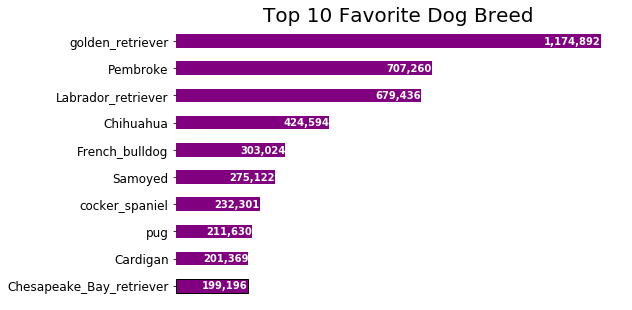

In [69]:
fave_count = ['1,174,892', '707,260', '679,436', '424,594', '303,024', '275,122', '232,301', '211,630', '201,369', '199,196'][::-1]
ax = favorite_breed.sort_values().plot(kind="barh", width=0.5, edgecolor='black', color="purple", figsize=(8,5), tick_label = fave_count)
plt.title("Top 10 Favorite Dog Breed", size = 20)
plt.xlabel("")
plt.ylabel("")
plt.yticks(size = 12)
plt.xticks([])
plt.box(False)

bars = ax.patches

for ind, bar in enumerate(bars):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, fave_count[ind],
           ha='right', va='center', color='white', weight='bold');